In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
import math

# Define the functions for the prediction and error calculation:

In [2]:
def calculatePath ( x_or_ypoints, timeDelta):
 
    timeArray = np.arange(0, timeDelta*len(x_or_ypoints), timeDelta)
    timeArray = timeArray.reshape(-1, 1) #must be reshaped, otherwise the regression can't be done

    polynomial = PolynomialFeatures(degree=2, include_bias=False)
    polynomial_features = polynomial.fit_transform(timeArray.reshape(-1, 1))
    polynomial_regression_model = LinearRegression()

    model = polynomial_regression_model.fit(polynomial_features, x_or_ypoints)

    return model.coef_, model.intercept_
    

In [3]:
def predictNextPositions (points, coefficients, intercept, timeDelta, timeToPredict):
    predictedPoints = [] #Empty list where the future X or Y values will be stored
    timeValue = (len(points)-1)*timeDelta #Time value of the last known point assuming first element of the list points is in t=0
    finalTimeToPredict = timeValue+timeToPredict #Calculate the time value for the last point that is gonna be predicted
    
    while timeValue < finalTimeToPredict:
        timeValue = timeValue+timeDelta
        predictedPoints.append(timeValue**2*coefficients[1]+timeValue*coefficients[0]+intercept)
    
    return predictedPoints

In [4]:
def euclideanDistance (x1, y1, x2, y2):
    return math.sqrt((x1-x2)**2+(y1-y2)**2)

In [5]:
def parabolic():
    xlist=np.arange(0.00,5.01,0.01)
    ylist=[]
    index=0
    index1=0
    index2=0
    x=0
    y=0
    while index<500:
        y= (1*(xlist[index]))**2
        ylist.append(y)
        index = index+1
        

    xnew=[0]
    ynew=[0]
    increase=0
    while index2<400:
        if euclideanDistance (xlist[index2], ylist[index2], xlist[index2+increase], ylist[index2+increase])>=0.25:
            xnew.append(xlist[index2])
            ynew.append(ylist[index2])
            index2=index2+increase
            increase=0
        else:
            increase=increase+1
        # index2=index2+1
    return xnew, ynew

calculateErrors iterates through the predicted points and calculates their error with respect to the real data point.

In [6]:
def calculateErrors (firstPointPosi, timeToPredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions):
    index = firstPointPosi
    errorList = []
    while index < firstPointPosi+(timeToPredict/timeBetweenSamples):
        error = euclideanDistance(xPositions[index], yPositions[index], xPredictions[index-firstPointPosi], yPredictions[index-firstPointPosi])
        errorList.append(error)
        index = index+1
    return errorList

In [7]:
def calculateRMSError (errorList):
    length = len(errorList)
    width = len(errorList[0])
    
    errorSumList = []
    
    indexLength = 0
    indexWitdth = 0
    while indexWitdth < width:
        sumOfErrors = 0
        indexLength = 0
        while indexLength < length:
            sumOfErrors = sumOfErrors + errorList[indexLength][indexWitdth]**2
            indexLength = indexLength + 1
            
        errorSumList.append(math.sqrt(sumOfErrors/length))
        indexWitdth = indexWitdth+1
    return errorSumList

In [8]:
def calcualteAverageError (errorList):
    length = len(errorList)
    width = len(errorList[0])
    
    errorSumList = []
    
    indexLength = 0
    indexWitdth = 0
    while indexWitdth < width:
        sumOfErrors = 0
        indexLength = 0
        while indexLength < length:
            sumOfErrors = sumOfErrors + errorList[indexLength][indexWitdth]
            indexLength = indexLength + 1
            
        errorSumList.append(sumOfErrors/length)
        indexWitdth = indexWitdth+1
    return errorSumList

In [9]:
def plotter (xPositions, yPositions, xPredictions, yPredictions, amountOfPoints, increment, startingPoint, timetoPredict):
    plt.figure()
    plt.grid("True")
    plt.scatter(xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], yPositions [startingPoint+increment: startingPoint+increment+amountOfPoints], label = "UWB positions for prediction", color = "r", marker = "1")
    plt.scatter(xPredictions, yPredictions, label= "Predicted positions", color = "g", marker = "2")
    plt.scatter(xPositions[startingPoint+increment+amountOfPoints+1: -1], yPositions [startingPoint+increment+amountOfPoints+1: -1], label = "Real future positions", color = "b", marker = "3")
    plt.legend()

    plt.title("Path with prediction done for %s secs, considering last %s positions" % (timetoPredict, amountOfPoints))
    plt.xlabel('X Position [m]')
    plt.ylabel('Y Position [m]')
    plt.show()

# Parabollic path combined with straight path: y = constant | y = parabollic | x = constant

It will be assumed that every data point has been obtained with a constant sample time of 0.25 seconds. Arrays of X position values and Y position values will be created.

In [10]:
xPositions = np.arange(-5.00, 0, 0.25)
yPositions = np.zeros(20)
data = parabolic()
y4 = np.dot(data[1],0.4)
xPositions = np.append(xPositions, data[0]) 
yPositions = np.append(yPositions, y4)

### Plot the simulation for the data without noise.

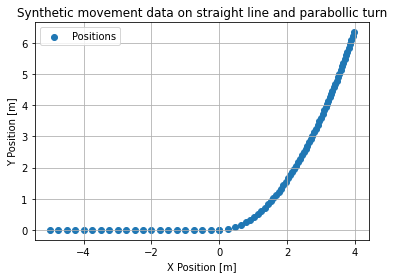

In [11]:
plt.figure()
plt.scatter(xPositions, yPositions, label = "Positions")
plt.title("Synthetic movement data on straight line and parabollic turn")
plt.grid("True")
plt.xlabel("X Position [m]")
plt.ylabel("Y Position [m]")
plt.legend()
plt.show()

### Plot the simulation for the data with noise.

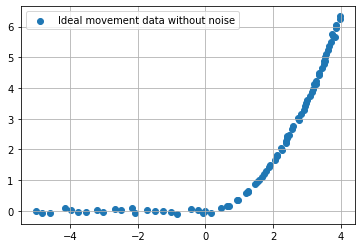

In [12]:
gaussianNoise = np.random.normal(0,0.05,81)

index = 0
for noise in gaussianNoise:
    yPositions[index] = yPositions[index]+noise
    xPositions[index] = xPositions[index]+noise
    index = index+1

plt.figure()
plt.scatter(xPositions, yPositions, label = "Ideal movement data without noise")
plt.grid("True")
plt.legend()
plt.show()

## POINT 1
We will plot one prediction at this point so we have a visual image of where are predicting the paths. Then we will do 10000 iterations to get more data. To do this simulations we will add noise to the path in order to be more realistic.

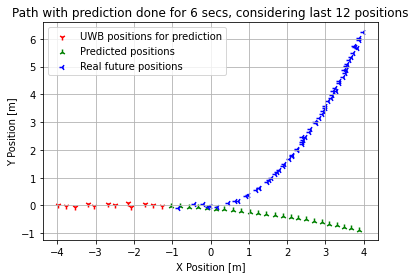

In [13]:
timeBetweenSamples = 0.25
timetopredict = 6
startingPoint = 4 #Oldest point taken into account for prediction at t = 1s
increment = 0
amountOfPoints = 12 #Three seconds are taken into account for the prediction, from t = 1s to t = 4s

personXCoef, personXinter = calculatePath (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
personYCoef, personYinter = calculatePath (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)

plotter (xPositions, yPositions, xPredictions, yPredictions, amountOfPoints, increment, startingPoint, timetopredict)


### Analysis 1: timeToPredict = 6s, current point = 20, amountOfPoints = 12 (1000 iterations):

Due to the lack of consistency of the tests with a few iterations, more iterations have been done to identify a solid pattern. Every run the different calcualtions can vary a lot, but the result of the 10000 doesn't.

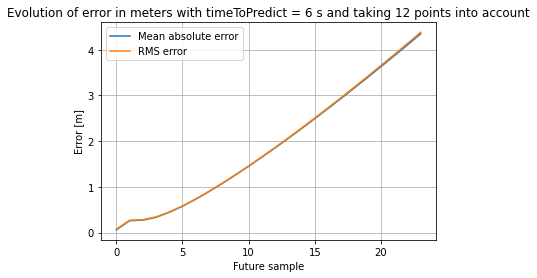

In [14]:
iterationIndex = 0
amountOfIterations = 10000

totalErrorList = []

timeBetweenSamples = 0.25
timetopredict = 6
amountOfPoints = 12 #Three seconds are taken into account for the prediction, from t = 1s to t = 4s
current_point = 20

yPositionsWithNoise = []
xPositionsWithNoise = []

startingPoint = current_point-amountOfPoints #Oldest point taken into account for prediction at t = 1s

while iterationIndex < amountOfIterations:
    
    xPositions = np.arange(-5.00, 0, 0.25)
    yPositions = np.zeros(20)


    data = parabolic()
    y4 = np.dot(data[1],0.4)
    xPositions = np.append(xPositions, data[0]) 
    yPositions = np.append(yPositions, y4)

    gaussianNoise = np.random.normal(0,0.05,81)

    index = 0
    for noise in gaussianNoise:
        yPositionsWithNoise.append(yPositions[index]+noise)
        xPositionsWithNoise.append(xPositions[index]+noise)
        index = index+1

    personXCoef, personXinter = calculatePath (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
    personYCoef, personYinter = calculatePath (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

    xPredictions = predictNextPositions (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
    yPredictions = predictNextPositions (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
    
    currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
    
    totalErrorList.insert(iterationIndex, currentErrorList)
    
    iterationIndex = iterationIndex+1
    
    xPositionsWithNoise.clear()
    yPositionsWithNoise.clear()

averageErrors1 = calcualteAverageError(totalErrorList)
RMSErrors1 = calculateRMSError(totalErrorList)
sampleArray = np.arange(0, timetopredict/timeBetweenSamples, 1)

plt.figure()
plt.title("Evolution of error in meters with timeToPredict = %s s and taking %s points into account" % (timetopredict, amountOfPoints))
plt.plot(sampleArray, averageErrors1, label = "Mean absolute error")
plt.plot(sampleArray, RMSErrors1, label = "RMS error")
plt.legend()
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.grid("True")
plt.show()


### Analysis 2: timeToPredict = 6s, current point = 20, amountOfPoints = 16 (10000 iterations):

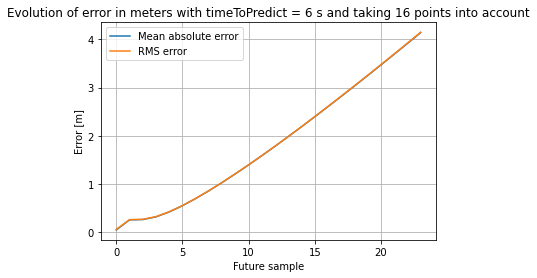

In [15]:
iterationIndex = 0
amountOfIterations = 10000

totalErrorList = []

timeBetweenSamples = 0.25
timetopredict = 6
amountOfPoints = 16 #Three seconds are taken into account for the prediction, from t = 1s to t = 4s
current_point = 20

yPositionsWithNoise = []
xPositionsWithNoise = []

startingPoint = current_point-amountOfPoints #Oldest point taken into account for prediction at t = 1s

while iterationIndex < amountOfIterations:
    
    xPositions = np.arange(-5.00, 0, 0.25)
    yPositions = np.zeros(20)


    data = parabolic()
    y4 = np.dot(data[1],0.4)
    xPositions = np.append(xPositions, data[0]) 
    yPositions = np.append(yPositions, y4)

    gaussianNoise = np.random.normal(0,0.05,81)

    index = 0
    for noise in gaussianNoise:
        yPositionsWithNoise.append(yPositions[index]+noise)
        xPositionsWithNoise.append(xPositions[index]+noise)
        index = index+1

    personXCoef, personXinter = calculatePath (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
    personYCoef, personYinter = calculatePath (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

    xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
    yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
    
    currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
    
    totalErrorList.insert(iterationIndex, currentErrorList)
    
    iterationIndex = iterationIndex+1
    
    xPositionsWithNoise.clear()
    yPositionsWithNoise.clear()
    
averageErrors2 = calcualteAverageError(totalErrorList)
RMSErrors2 = calculateRMSError(totalErrorList)
sampleArray = np.arange(0, timetopredict/timeBetweenSamples, 1)

plt.figure()
plt.title("Evolution of error in meters with timeToPredict = %s s and taking %s points into account" % (timetopredict, amountOfPoints))
plt.plot(sampleArray, averageErrors2, label = "Mean absolute error")
plt.plot(sampleArray, RMSErrors2, label = "RMS error")
plt.legend()
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.grid("True")
plt.show()


### Analysis 2: timeToPredict = 6s, current point = 20, amountOfPoints = 20 (10000 iterations):

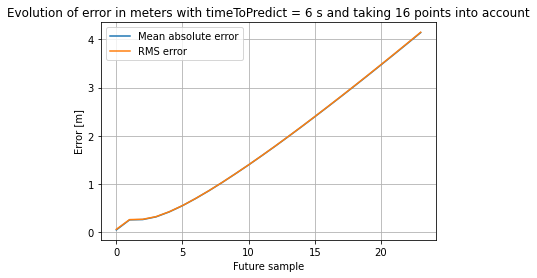

In [16]:
iterationIndex = 0
amountOfIterations = 10000

totalErrorList = []

timeBetweenSamples = 0.25
timetopredict = 6
amountOfPoints = 16 #Three seconds are taken into account for the prediction, from t = 1s to t = 4s
current_point = 20

yPositionsWithNoise = []
xPositionsWithNoise = []

startingPoint = current_point-amountOfPoints #Oldest point taken into account for prediction at t = 1s

while iterationIndex < amountOfIterations:
    
    xPositions = np.arange(-5.00, 0, 0.25)
    yPositions = np.zeros(20)


    data = parabolic()
    y4 = np.dot(data[1],0.4)
    xPositions = np.append(xPositions, data[0]) 
    yPositions = np.append(yPositions, y4)

    gaussianNoise = np.random.normal(0,0.05,81)

    index = 0
    for noise in gaussianNoise:
        yPositionsWithNoise.append(yPositions[index]+noise)
        xPositionsWithNoise.append(xPositions[index]+noise)
        index = index+1

    personXCoef, personXinter = calculatePath (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
    personYCoef, personYinter = calculatePath (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

    xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
    yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
    
    currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
    
    totalErrorList.insert(iterationIndex, currentErrorList)
    
    iterationIndex = iterationIndex+1
    
    xPositionsWithNoise.clear()
    yPositionsWithNoise.clear()
    
averageErrors3 = calcualteAverageError(totalErrorList)
RMSErrors3 = calculateRMSError(totalErrorList)
sampleArray = np.arange(0, timetopredict/timeBetweenSamples, 1)

plt.figure()
plt.title("Evolution of error in meters with timeToPredict = %s s and taking %s points into account" % (timetopredict, amountOfPoints))
plt.plot(sampleArray, averageErrors3, label = "Mean absolute error")
plt.plot(sampleArray, RMSErrors3, label = "RMS error")
plt.legend()
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.grid("True")
plt.show()


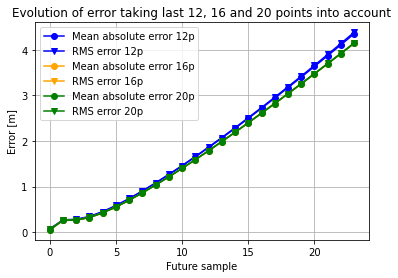

In [17]:
plt.figure()
plt.title("Evolution of error taking last 12, 16 and 20 points into account")
plt.grid("True")
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.plot(sampleArray, averageErrors1, label="Mean absolute error 12p", color="b", marker = "o")
plt.plot(sampleArray, RMSErrors1, label="RMS error 12p", color="b", marker = "v")
plt.plot(sampleArray, averageErrors2, label="Mean absolute error 16p", color="orange", marker = "o")
plt.plot(sampleArray, RMSErrors2, label="RMS error 16p", color="orange", marker = "v")
plt.plot(sampleArray, averageErrors3, label="Mean absolute error 20p", color="green", marker = "o")
plt.plot(sampleArray, RMSErrors3, label="RMS error 20p", color="green", marker = "v")
plt.legend()
plt.show()

## POINT 2
### The same analysis has been done but in a further located position

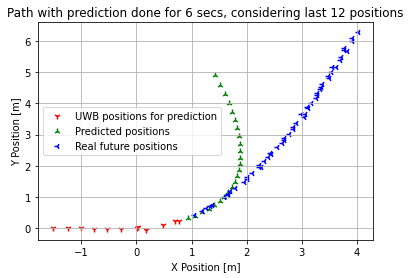

In [18]:
xPositions = np.arange(-5.00, 0, 0.25)
yPositions = np.zeros(20)
data = parabolic()
y4 = np.dot(data[1],0.4)
xPositions = np.append(xPositions, data[0]) 
yPositions = np.append(yPositions, y4)


gaussianNoise = np.random.normal(0,0.05,81)

index = 0
for noise in gaussianNoise:
    yPositions[index] = yPositions[index]+noise
    xPositions[index] = xPositions[index]+noise
    index = index+1
    
timeBetweenSamples = 0.25
timetopredict = 6

increment = 0
amountOfPoints = 12 #Three seconds are taken into account for the prediction, from t = 1s to t = 4s
current_point =26
startingPoint = current_point-amountOfPoints #Oldest point taken into account for prediction at t = 1s

personXCoef, personXinter = calculatePath (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
personYCoef, personYinter = calculatePath (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)

plotter (xPositions, yPositions, xPredictions, yPredictions, amountOfPoints, increment, startingPoint, timetopredict)

### Analysis 1: timeToPredict = 6s, current point = 26, amountOfPoints = 12 (1000 iterations):


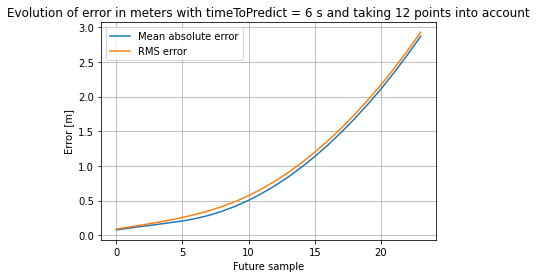

In [19]:
iterationIndex = 0
amountOfIterations = 10000

totalErrorList = []

timeBetweenSamples = 0.25
timetopredict = 6
amountOfPoints = 12 #Three seconds are taken into account for the prediction, from t = 1s to t = 4s
current_point =26

yPositionsWithNoise = []
xPositionsWithNoise = []

startingPoint = current_point-amountOfPoints #Oldest point taken into account for prediction at t = 1s

while iterationIndex < amountOfIterations:
    
    xPositions = np.arange(-5.00, 0, 0.25)
    yPositions = np.zeros(20)


    data = parabolic()
    y4 = np.dot(data[1],0.4)
    xPositions = np.append(xPositions, data[0]) 
    yPositions = np.append(yPositions, y4)

    gaussianNoise = np.random.normal(0,0.05,81)

    index = 0
    for noise in gaussianNoise:
        yPositionsWithNoise.append(yPositions[index]+noise)
        xPositionsWithNoise.append(xPositions[index]+noise)
        index = index+1

    personXCoef, personXinter = calculatePath (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
    personYCoef, personYinter = calculatePath (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

    xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
    yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
    
    currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
    
    totalErrorList.insert(iterationIndex, currentErrorList)
    
    iterationIndex = iterationIndex+1
    
    yPositionsWithNoise.clear()
    xPositionsWithNoise.clear()
    
averageErrors1 = calcualteAverageError(totalErrorList)
RMSErrors1 = calculateRMSError(totalErrorList)
sampleArray = np.arange(0, timetopredict/timeBetweenSamples, 1)

plt.figure()
plt.title("Evolution of error in meters with timeToPredict = %s s and taking %s points into account" % (timetopredict, amountOfPoints))
plt.plot(sampleArray, averageErrors1, label = "Mean absolute error")
plt.plot(sampleArray, RMSErrors1, label = "RMS error")
plt.legend()
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.grid("True")
plt.show()

### Analysis 2: timeToPredict = 6s, current point = 26, amountOfPoints = 16 (10000 iterations):

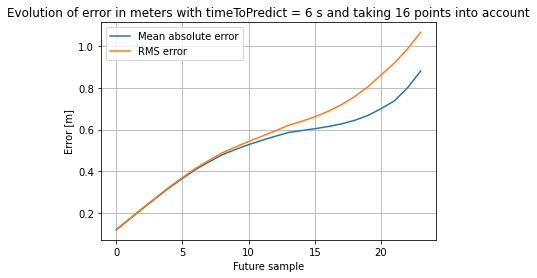

In [20]:
iterationIndex = 0
amountOfIterations = 10000

totalErrorList = []

timeBetweenSamples = 0.25
timetopredict = 6
amountOfPoints = 16 #Three seconds are taken into account for the prediction, from t = 1s to t = 4s
current_point =26
startingPoint = current_point-amountOfPoints #Oldest point taken into account for prediction at t = 1s

while iterationIndex < amountOfIterations:
    
    xPositions = np.arange(-5.00, 0, 0.25)
    yPositions = np.zeros(20)


    data = parabolic()
    y4 = np.dot(data[1],0.4)
    xPositions = np.append(xPositions, data[0]) 
    yPositions = np.append(yPositions, y4)

    gaussianNoise = np.random.normal(0,0.05,81)

    index = 0
    for noise in gaussianNoise:
        yPositionsWithNoise.append(yPositions[index]+noise)
        xPositionsWithNoise.append(xPositions[index]+noise)
        index = index+1

    personXCoef, personXinter = calculatePath (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
    personYCoef, personYinter = calculatePath (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

    xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
    yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
    
    currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
    
    totalErrorList.insert(iterationIndex, currentErrorList)
    
    iterationIndex = iterationIndex+1
    
    xPositionsWithNoise.clear()
    yPositionsWithNoise.clear()
    
averageErrors2 = calcualteAverageError(totalErrorList)
RMSErrors2 = calculateRMSError(totalErrorList)
sampleArray = np.arange(0, timetopredict/timeBetweenSamples, 1)

plt.figure()
plt.title("Evolution of error in meters with timeToPredict = %s s and taking %s points into account" % (timetopredict, amountOfPoints))
plt.plot(sampleArray, averageErrors2, label = "Mean absolute error")
plt.plot(sampleArray, RMSErrors2, label = "RMS error")
plt.legend()
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.grid("True")
plt.show()

### Analysis 3: timeToPredict = 6s, current point = 26, amountOfPoints = 20 (10000 iterations):

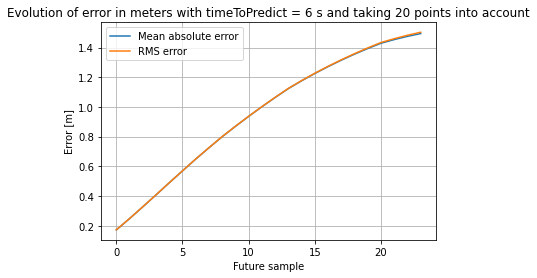

In [21]:
iterationIndex = 0
amountOfIterations = 10000

totalErrorList = []

timeBetweenSamples = 0.25
timetopredict = 6
amountOfPoints = 20 #Three seconds are taken into account for the prediction, from t = 1s to t = 4s
current_point = 26

xPositionsWithNoise = []
yPositionsWithNoise = []

startingPoint = current_point-amountOfPoints #Oldest point taken into account for prediction at t = 1s

while iterationIndex < amountOfIterations:
    
    xPositions = np.arange(-5.00, 0, 0.25)
    yPositions = np.zeros(20)


    data = parabolic()
    y4 = np.dot(data[1],0.4)
    xPositions = np.append(xPositions, data[0]) 
    yPositions = np.append(yPositions, y4)

    gaussianNoise = np.random.normal(0,0.05,81)

    index = 0
    for noise in gaussianNoise:
        yPositionsWithNoise.append(yPositions[index]+noise)
        xPositionsWithNoise.append(xPositions[index]+noise)
        index = index+1

    personXCoef, personXinter = calculatePath (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
    personYCoef, personYinter = calculatePath (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

    xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
    yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
    
    currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
    
    totalErrorList.insert(iterationIndex, currentErrorList)
    
    iterationIndex = iterationIndex+1
    
    xPositionsWithNoise.clear()
    yPositionsWithNoise.clear()
    
averageErrors3 = calcualteAverageError(totalErrorList)
RMSErrors3 = calculateRMSError(totalErrorList)
sampleArray = np.arange(0, timetopredict/timeBetweenSamples, 1)

plt.figure()
plt.title("Evolution of error in meters with timeToPredict = %s s and taking %s points into account" % (timetopredict, amountOfPoints))
plt.plot(sampleArray, averageErrors3, label = "Mean absolute error")
plt.plot(sampleArray, RMSErrors3, label = "RMS error")
plt.legend()
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.grid("True")
plt.show()

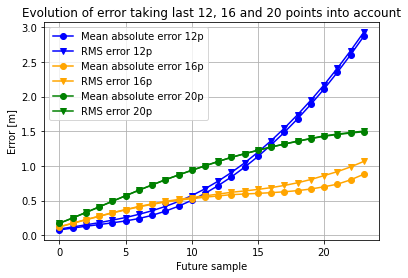

In [22]:
plt.figure()
plt.title("Evolution of error taking last 12, 16 and 20 points into account")
plt.grid("True")
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.plot(sampleArray, averageErrors1, label="Mean absolute error 12p", color="b", marker = "o")
plt.plot(sampleArray, RMSErrors1, label="RMS error 12p", color="b", marker = "v")
plt.plot(sampleArray, averageErrors2, label="Mean absolute error 16p", color="orange", marker = "o")
plt.plot(sampleArray, RMSErrors2, label="RMS error 16p", color="orange", marker = "v")
plt.plot(sampleArray, averageErrors3, label="Mean absolute error 20p", color="green", marker = "o")
plt.plot(sampleArray, RMSErrors3, label="RMS error 20p", color="green", marker = "v")
plt.legend()
plt.show()

## POINT 3
### A last analysis has been done in a further point.

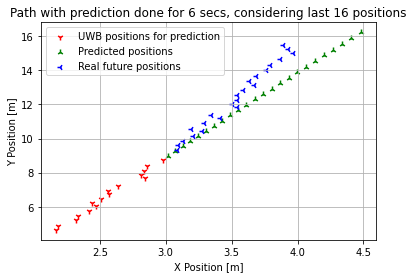

In [23]:
xPositions = np.arange(-5.00, 0, 0.25)
yPositions = np.zeros(20)
data = parabolic()
xPositions = np.append(xPositions, data[0]) 
yPositions = np.append(yPositions, data[1])


gaussianNoise = np.random.normal(0,0.05,81)

index = 0
for noise in gaussianNoise:
    yPositions[index] = yPositions[index]+noise
    xPositions[index] = xPositions[index]+noise
    index = index+1
    
timeBetweenSamples = 0.25
timetopredict = 6

increment = 0
amountOfPoints = 16 #Three seconds are taken into account for the prediction, from t = 1s to t = 4s
current_point =57
startingPoint = current_point-amountOfPoints #Oldest point taken into account for prediction at t = 1s

personXCoef, personXinter = calculatePath (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
personYCoef, personYinter = calculatePath (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)

plotter (xPositions, yPositions, xPredictions, yPredictions, amountOfPoints, increment, startingPoint, timetopredict)

### Analysis 1: timeToPredict = 6s, current point = 57, amountOfPoints = 12 (1000 iterations):

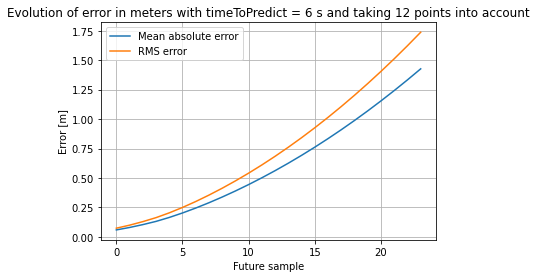

In [24]:
iterationIndex = 0
amountOfIterations = 10000

totalErrorList = []

timeBetweenSamples = 0.25
timetopredict = 6
amountOfPoints = 12 #Three seconds are taken into account for the prediction, from t = 1s to t = 4s
current_point = 57

xPositionsWithNoise = []
yPositionsWithNoise = []

startingPoint = current_point-amountOfPoints #Oldest point taken into account for prediction at t = 1s

while iterationIndex < amountOfIterations:
    
    xPositions = np.arange(-5.00, 0, 0.25)
    yPositions = np.zeros(20)

    data = parabolic()
    y4 = np.dot(data[1],0.4)
    xPositions = np.append(xPositions, data[0]) 
    yPositions = np.append(yPositions, y4)

    gaussianNoise = np.random.normal(0,0.05,81)

    index = 0
    for noise in gaussianNoise:
        yPositionsWithNoise.append(yPositions[index]+noise)
        xPositionsWithNoise.append(xPositions[index]+noise)
        index = index+1

    personXCoef, personXinter = calculatePath (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
    personYCoef, personYinter = calculatePath (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

    xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
    yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
    
    currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
    
    totalErrorList.insert(iterationIndex, currentErrorList)
    
    iterationIndex = iterationIndex+1
    
    xPositionsWithNoise.clear()
    yPositionsWithNoise.clear()
    
averageErrors1 = calcualteAverageError(totalErrorList)
RMSErrors1 = calculateRMSError(totalErrorList)
sampleArray = np.arange(0, timetopredict/timeBetweenSamples, 1)

plt.figure()
plt.title("Evolution of error in meters with timeToPredict = %s s and taking %s points into account" % (timetopredict, amountOfPoints))
plt.plot(sampleArray, averageErrors1, label = "Mean absolute error")
plt.plot(sampleArray, RMSErrors1, label = "RMS error")
plt.legend()
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.grid("True")
plt.show()

### Analysis 2: timeToPredict = 6s, current point = 57, amountOfPoints = 16 (10000 iterations):

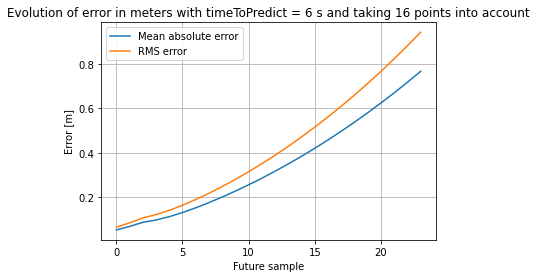

In [25]:
iterationIndex = 0
amountOfIterations = 10000

totalErrorList = []

timeBetweenSamples = 0.25
timetopredict = 6
amountOfPoints = 16 #Three seconds are taken into account for the prediction, from t = 1s to t = 4s
current_point =57

xPositionsWithNoise = []
yPositionsWithNoise = []

startingPoint = current_point-amountOfPoints #Oldest point taken into account for prediction at t = 1s

while iterationIndex < amountOfIterations:
    
    xPositions = np.arange(-5.00, 0, 0.25)
    yPositions = np.zeros(20)


    data = parabolic()
    y4 = np.dot(data[1],0.4)
    xPositions = np.append(xPositions, data[0]) 
    yPositions = np.append(yPositions, y4)

    gaussianNoise = np.random.normal(0,0.05,81)

    index = 0
    for noise in gaussianNoise:
        yPositionsWithNoise.append(yPositions[index]+noise)
        xPositionsWithNoise.append(xPositions[index]+noise)
        index = index+1

    personXCoef, personXinter = calculatePath (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
    personYCoef, personYinter = calculatePath (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

    xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
    yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
    
    currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
    
    totalErrorList.insert(iterationIndex, currentErrorList)
    
    iterationIndex = iterationIndex+1
    
    xPositionsWithNoise.clear()
    yPositionsWithNoise.clear()
    
averageErrors2 = calcualteAverageError(totalErrorList)
RMSErrors2 = calculateRMSError(totalErrorList)
sampleArray = np.arange(0, timetopredict/timeBetweenSamples, 1)

plt.figure()
plt.title("Evolution of error in meters with timeToPredict = %s s and taking %s points into account" % (timetopredict, amountOfPoints))
plt.plot(sampleArray, averageErrors2, label = "Mean absolute error")
plt.plot(sampleArray, RMSErrors2, label = "RMS error")
plt.legend()
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.grid("True")
plt.show()

### Analysis 3: timeToPredict = 6s, current point = 57, amountOfPoints = 20 (10000 iterations):

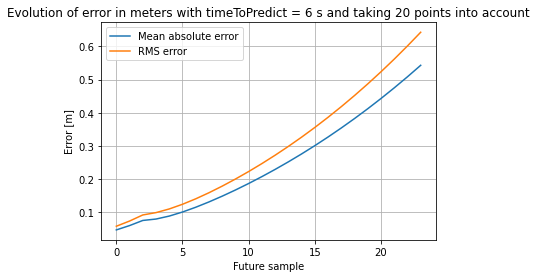

In [26]:
iterationIndex = 0
amountOfIterations = 10000

totalErrorList = []

timeBetweenSamples = 0.25
timetopredict = 6
amountOfPoints = 20 #Three seconds are taken into account for the prediction, from t = 1s to t = 4s
current_point = 57

xPositionsWithNoise = []
yPositionsWithNoise = []

startingPoint = current_point-amountOfPoints #Oldest point taken into account for prediction at t = 1s

while iterationIndex < amountOfIterations:
    
    xPositions = np.arange(-5.00, 0, 0.25)
    yPositions = np.zeros(20)


    data = parabolic()
    y4 = np.dot(data[1],0.4)
    xPositions = np.append(xPositions, data[0]) 
    yPositions = np.append(yPositions, y4)

    gaussianNoise = np.random.normal(0,0.05,81)

    index = 0
    for noise in gaussianNoise:
        yPositionsWithNoise.append(yPositions[index]+noise)
        xPositionsWithNoise.append(xPositions[index]+noise)
        index = index+1

    personXCoef, personXinter = calculatePath (xPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)
    personYCoef, personYinter = calculatePath (yPositionsWithNoise[startingPoint+increment: startingPoint+increment+amountOfPoints], timeBetweenSamples)

    xPredictions = predictNextPositions (xPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personXCoef, personXinter, timeBetweenSamples, timetopredict)
    yPredictions = predictNextPositions (yPositions[startingPoint+increment: startingPoint+increment+amountOfPoints], personYCoef, personYinter, timeBetweenSamples, timetopredict)
    
    currentErrorList = calculateErrors(startingPoint+amountOfPoints+increment, timetopredict, timeBetweenSamples, xPositions, yPositions, xPredictions, yPredictions)
    
    totalErrorList.insert(iterationIndex, currentErrorList)
    
    iterationIndex = iterationIndex+1
    
    xPositionsWithNoise.clear()
    yPositionsWithNoise.clear()
    
averageErrors3 = calcualteAverageError(totalErrorList)
RMSErrors3 = calculateRMSError(totalErrorList)
sampleArray = np.arange(0, timetopredict/timeBetweenSamples, 1)

plt.figure()
plt.title("Evolution of error in meters with timeToPredict = %s s and taking %s points into account" % (timetopredict, amountOfPoints))
plt.plot(sampleArray, averageErrors3, label = "Mean absolute error")
plt.plot(sampleArray, RMSErrors3, label = "RMS error")
plt.legend()
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.grid("True")
plt.show()

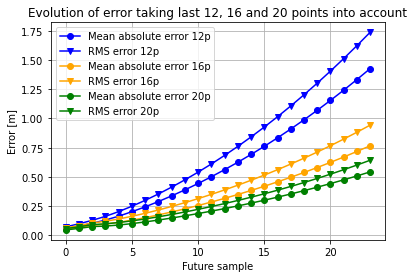

In [27]:
plt.figure()
plt.title("Evolution of error taking last 12, 16 and 20 points into account")
plt.grid("True")
plt.xlabel("Future sample")
plt.ylabel("Error [m]")
plt.plot(sampleArray, averageErrors1, label="Mean absolute error 12p", color="b", marker = "o")
plt.plot(sampleArray, RMSErrors1, label="RMS error 12p", color="b", marker = "v")
plt.plot(sampleArray, averageErrors2, label="Mean absolute error 16p", color="orange", marker = "o")
plt.plot(sampleArray, RMSErrors2, label="RMS error 16p", color="orange", marker = "v")
plt.plot(sampleArray, averageErrors3, label="Mean absolute error 20p", color="green", marker = "o")
plt.plot(sampleArray, RMSErrors3, label="RMS error 20p", color="green", marker = "v")
plt.legend()
plt.show()